In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd

In [2]:
def runn_avg(x, y, r):
    avgx = []; avgy = []
    ind = int(r//x[1]) + 1
    for i in range(ind, len(x)-ind):
        avgx.append(x[i])
        avgy.append(sum(y[i-ind:i+ind])/(2*ind))
    return np.array(avgx), np.array(avgy)

def plotDOS(file,EF,ice,color='b'):
    f = open(file)
    f1 = f.readlines()
    f.close()
    E = []; D = []
    for line in f1:
        L = [float(x) for x in line.split()]
        E.append(L[0]-EF); D.append(L[1])
    plt.plot(E, D, color, label=ice)

# Figure 2

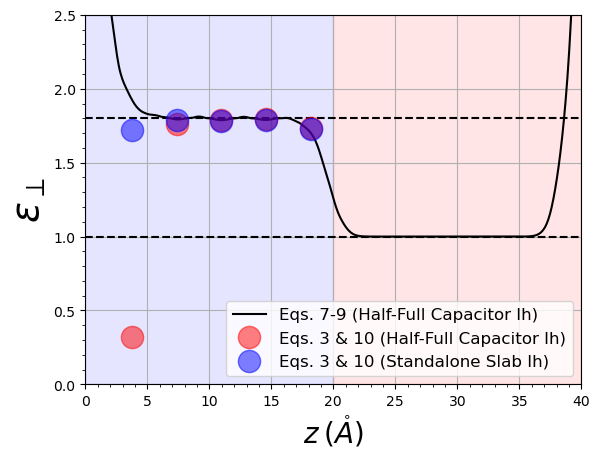

In [3]:
bias = [-0.5, 0.5]
    
path = './Half-Full/IhAu/'
df = pd.read_csv(path+'charge.csv')
z = df['z'].to_numpy(); charge = df['charge'].to_numpy(); chargesum = df['chargesum'].to_numpy()
df = pd.read_csv(path+'potential.csv')
z = df['z'].to_numpy(); potential = df['potential'].to_numpy()

eps0 = 5.52635e-3
A = np.cos(np.pi/6)*8.88**2
w = 3.615

# Displacement Field from Hartree Potential
E = 0; i0 = 600; di = 100
for i in range(i0,i0+di):
    E -= (potential[i+1]-potential[i])/z[1]
E /= di
D1 = eps0*E

# Displacement Field from Charge Density
Q = sum(chargesum[i0:i0+di])/di
D2 = Q/A

DC = (D1+D2)/2
    
avgz, avgchargesum = runn_avg(z, chargesum, 1.8075)
avgP = -(avgchargesum/A - DC)


# Get Polarizations for Capacitor
dips = np.zeros((2,8,5))
zs = np.zeros((2,8,5))
for i in range(2):
    file = path+'ts_{}/ts_au_layer_centres.dips'.format(bias[i])
    f = open(file)
    f1 = f.readlines()
    f.close()
    for j in range(len(f1)):
        L = [float(x) for x in f1[j].split()]
        l = int((L[2]-22)//3.615)
        k = np.where(dips[i,:,l]==0)[0][0]
        dips[i,k,l] = L[5]
        zs[i,k,l] = L[2]
PC = np.sum(dips[1,:,:]-dips[0,:,:],axis=0)/A
zO = np.mean(zs[0,:,:],axis=0)

# Get Polarizations for Slab
bias = [-1,1]
dips = np.zeros((2,8,5))
zs = np.zeros((2,8,5))
for i in range(2):
    file = './Half-Full/Ih/Ice_Au{}_centres.dips'.format(bias[i])
    f = open(file)
    f1 = f.readlines()
    f.close()
    for j in range(len(f1)):
        L = [float(x) for x in f1[j].split()]
        l = int((L[2]-22)//3.615)
        if l < 5:
            k = np.where(dips[i,:,l]==0)[0][0]
            dips[i,k,l] = L[5]
            zs[i,k,l] = L[2]
PS = np.sum(dips[1,:,:]-dips[0,:,:],axis=0)/A
zO = np.mean(zs[0,:,:],axis=0)
DS = eps0*0.05

plt.plot(avgz-19.33464, 1/(1-avgP/DC), 'k', label='Eqs. 7-9 (Half-Full Capacitor Ih)')
plt.plot(avgz-19.33464, np.ones(len(avgz))*1.8, 'k--')
plt.plot(avgz-19.33464, np.ones(len(avgz)), 'k--')            
plt.plot(zO-19.33464, 1/(1-PC/DC/w), 'ro', label='Eqs. 3 & 10 (Half-Full Capacitor Ih)', markersize=16, alpha=0.5)
plt.plot(zO-19.33464, 1/(1-PS/DS/w), 'bo', label='Eqs. 3 & 10 (Standalone Slab Ih)', markersize=16, alpha=0.5)
plt.fill_betweenx(np.linspace(0,2.5,10), 0, x2=20, color='b', alpha=0.1)
plt.fill_betweenx(np.linspace(0,2.5,10), 20, x2=40.00485, color='r', alpha=0.1)
plt.minorticks_on()
plt.grid()
plt.ylim(0,2.5)
plt.xlim(0,40.00485)
plt.xlabel(r'$z \: (\mathring{A})$', fontsize=20)
plt.ylabel(r'$\epsilon_{\perp}$', fontsize=28)
plt.legend(fontsize=12)
plt.show()

# Figure 3

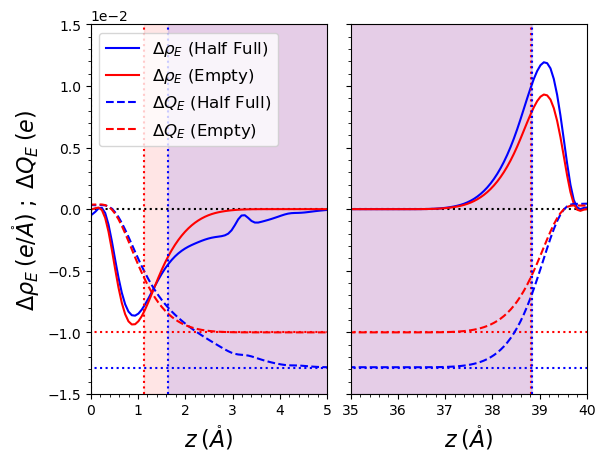

In [4]:
# Empty Capacitor
path = './TS_2elec/1h1/empty/'
df = pd.read_csv(path+'charge.csv')
z0 = df['z'].to_numpy(); charge0 = df['charge'].to_numpy(); chargesum0 = df['chargesum'].to_numpy()

# Half-Full Capacitor
path = './Half-Full/IhAu/'
df = pd.read_csv(path+'charge.csv')
z1 = df['z'].to_numpy(); charge1 = df['charge'].to_numpy(); chargesum1 = df['chargesum'].to_numpy()

# Slab
path = './Half-Full/Ih/'
df = pd.read_csv(path+'charge.csv')
z2 = df['z'].to_numpy(); charge2 = df['charge'].to_numpy(); chargesum2 = df['chargesum'].to_numpy()
f = interp1d(z2,chargesum2,kind='cubic')
g = interp1d(z2,charge2,kind='cubic')

zL0 = np.sum(z0[:len(z0)//2]*charge0[:len(z0)//2])/np.sum(charge0[:len(z0)//2])
zL1 = np.sum(z1[:len(z1)//2]*(charge1-g(z1)*DC/DS)[:len(z1)//2])/np.sum((charge1-g(z1)*DC/DS)[:len(z1)//2])
zR0 = np.sum(z0[len(z0)//2:]*charge0[len(z0)//2:])/np.sum(charge0[len(z0)//2:])
zR1 = np.sum(z1[len(z1)//2:]*(charge1-g(z1)*DC/DS)[len(z1)//2:])/np.sum((charge1-g(z1)*DC/DS)[len(z1)//2:])


plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.1)
plt.plot(z0-19.33464, np.zeros(len(z0)),'k:')
plt.plot(z0-19.33464, np.ones(len(z0))*np.min(chargesum0),'r:')
plt.plot(z0-19.33464, np.ones(len(z0))*np.min(chargesum1-f(z1)*DC/DS),'b:')
plt.plot(z1-19.33464,charge1-g(z1)*DC/DS,'b',label=r'$\Delta \rho_E$ (Half Full)')
plt.plot(z0-19.33464,charge0,'r',label=r'$\Delta \rho_E$ (Empty)')
plt.plot(z1-19.33464,chargesum1-f(z1)*DC/DS,'b--',label=r'$\Delta Q_E$ (Half Full)')
plt.plot(z0-19.33464,chargesum0,'r--',label=r'$\Delta Q_E$ (Empty)')
plt.vlines([19.33464-19.33464, zL0-19.33464, zL1-19.33464], -1.5e-2, 1.5e-2, color=['k','r','b'], linestyles='dotted')
plt.fill_betweenx(np.linspace(-1.5e-2,1.5e-2,10), zL0-19.33464, x2=zR0-19.33464, color='r', alpha=0.1)
plt.fill_betweenx(np.linspace(-1.5e-2,1,10), zL1-19.33464, x2=zR1-19.33464, color='b', alpha=0.1)

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel(r'$z \: (\mathring{A})$', fontsize=16)
plt.ylabel(r'$\Delta \rho_E \: (e/\mathring{A}) \; ; \; \Delta Q_E \: (e)$',fontsize=16)
plt.legend(fontsize=12,loc='upper left')
plt.xlim(0,5)
plt.ylim(-1.5e-2,1.5e-2)
plt.minorticks_on()

plt.subplot(1,2,2)
plt.plot(z0-19.33464, np.zeros(len(z0)),'k:')
plt.plot(z0-19.33464, np.ones(len(z0))*np.min(chargesum0),'r:')
plt.plot(z0-19.33464, np.ones(len(z0))*np.min(chargesum1-f(z1)*DC/DS),'b:')
plt.plot(z1-19.33464,charge1-g(z1)*DC/DS,'b',label=r'$\Delta \rho_E$ (Half Full)')
plt.plot(z0-19.33464,charge0,'r',label=r'$\Delta \rho_E$ (Empty)')
plt.plot(z1-19.33464,chargesum1-f(z1)*DC/DS,'b--',label=r'$\Delta Q_E$ (Half Full)')
plt.plot(z0-19.33464,chargesum0,'r--',label=r'$\Delta Q_E$ (Empty)')
plt.vlines([19.33464-19.33464, zR0-19.33464, zR1-19.33464], -1.5e-2, 1.5e-2, color=['k','r','b'], linestyles='dotted')
plt.fill_betweenx(np.linspace(-1.5e-2,1.5e-2,10), zL0-19.33464, x2=zR0-19.33464, color='r', alpha=0.1)
plt.fill_betweenx(np.linspace(-1.5e-2,1,10), zL1-19.33464, x2=zR1-19.33464, color='b', alpha=0.1)

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.tick_params(labelleft=False)
plt.xlabel(r'$z \: (\mathring{A})$', fontsize=16)
plt.xlim(35,40)
plt.ylim(-1.5e-2,1.5e-2)
plt.minorticks_on()

plt.show()

# Figure 4 (S6)

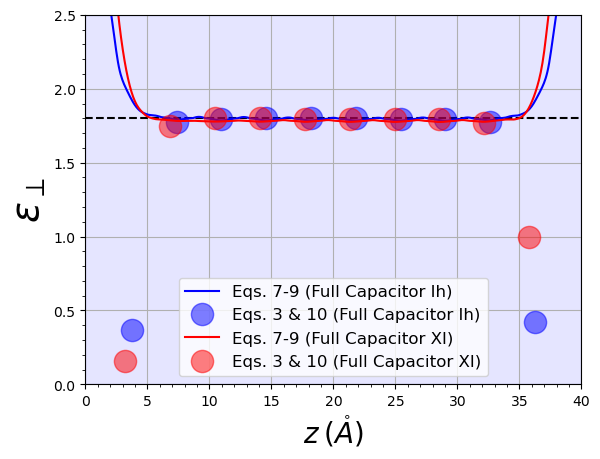

In [5]:
for ice in ['1h1', 'xi1']:
    
    bias = [-0.5, 0.5]
    
    path = './TS_2elec/{}/'.format(ice)
    df = pd.read_csv(path+'charge.csv')
    z = df['z'].to_numpy(); charge = df['charge'].to_numpy(); chargesum = df['chargesum'].to_numpy()
    df = pd.read_csv(path+'potential.csv')
    z = df['z'].to_numpy(); potential = df['potential'].to_numpy()

    eps0 = 5.52635e-3
    A = np.cos(np.pi/6)*8.88**2
    w = 3.615
    
    E = 0; i0 = 350; di = 400
    for i in range(i0,i0+di):
        E -= (potential[i+1]-potential[i])/z[1]
    E /= di
    
    dips = np.zeros((2,8,10))
    zs = np.zeros((2,8,10))
    for i in range(2):
        file = path+'ts_{}/ts_au_layer_centres.dips'.format(bias[i])
        f = open(file)
        f1 = f.readlines()
        f.close()
        for j in range(len(f1)):
            L = [float(x) for x in f1[j].split()]
            l = int((L[2]-22)//3.615)
            k = np.where(dips[i,:,l]==0)[0][0]
            dips[i,k,l] = L[5]
            zs[i,k,l] = L[2]
    PC = np.sum(dips[1,:,:]-dips[0,:,:],axis=0)/A
    zO = np.mean(zs[0,:,:],axis=0)

    DC = eps0*E + np.mean(PC[4:6])/w
    
    avgz, avgchargesum = runn_avg(z, chargesum, 1.8075)
    avgP = -(avgchargesum/A - DC)
    
    if ice == '1h1':
        plt.plot(avgz-19.33464, np.ones(len(avgz))*1.8, 'k--')
        plt.plot(avgz-19.33464, 1/(1-avgP/DC), 'b', label='Eqs. 7-9 (Full Capacitor Ih)')
        plt.plot(zO-19.33464, 1/(1-PC/DC/w), 'bo', markersize=16, alpha=0.5, label='Eqs. 3 & 10 (Full Capacitor Ih)')
    else:
        plt.plot(avgz-19.33464, 1/(1-avgP/DC), 'r', label='Eqs. 7-9 (Full Capacitor XI)')
        plt.plot(zO-19.33464, 1/(1-PC/DC/w), 'ro', markersize=16, alpha=0.5, label='Eqs. 3 & 10 (Full Capacitor XI)')

plt.fill_betweenx(np.linspace(0,2.5,10), 0, x2=40, color='b', alpha=0.1)
plt.minorticks_on()
plt.grid()
plt.ylim(0,2.5)
plt.xlim(0,40)
plt.xlabel(r'$z \: (\mathring{A})$', fontsize=20)
plt.ylabel(r'$\epsilon_{\perp}$', fontsize=28)
plt.legend(fontsize=12)
plt.show()

# Figure S3

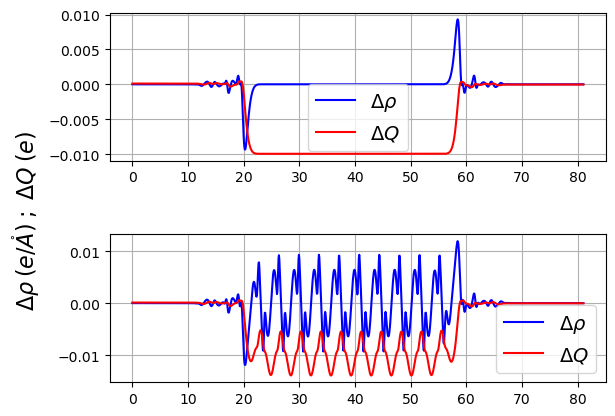

In [6]:
path = './TS_2elec/1h1/'

df = pd.read_csv(path+'empty/charge.csv')
z0 = df['z'].to_numpy(); charge0 = df['charge'].to_numpy(); chargesum0 = df['chargesum'].to_numpy()
chargesum0 = chargesum0-chargesum0[-1]/2
Q0 = np.abs(np.min(chargesum0))

df = pd.read_csv(path+'charge.csv')
z1 = df['z'].to_numpy(); charge1 = df['charge'].to_numpy(); chargesum1 = df['chargesum'].to_numpy()
chargesum1 = chargesum1-chargesum1[-1]/2

plt.subplot(2,1,1)
plt.plot(z0,charge0,'b',label=r'$\Delta \rho$')
plt.plot(z0,chargesum0,'r',label=r'$\Delta Q$')
plt.grid()
plt.legend(fontsize=14)
plt.subplot(2,1,2)
plt.plot(z1,charge1,'b',label=r'$\Delta \rho$')
plt.plot(z1,chargesum1,'r',label=r'$\Delta Q$')
plt.grid()
plt.legend(fontsize=14)
plt.subplots_adjust(hspace=0.5)
plt.text(-22,0,r'$\Delta \rho \: (e/\mathring{A}) \; ; \; \Delta Q \: (e)$',rotation=90,fontsize=16)
plt.show()

# Figure S4

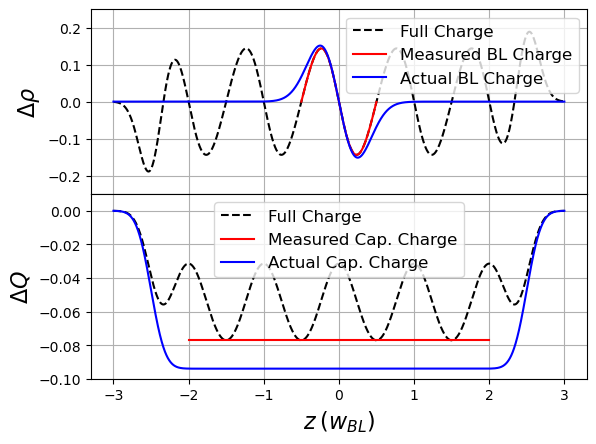

In [7]:
a = 0.25
b = 0.15
x = np.arange(-3,3, 1e-3)
f0 = 0.25*np.exp(-0.5*((x+2.5)/b)**2)
f1 = (x+2)*np.exp(-0.5*((x+2)/a)**2)
f2 = (x+1)*np.exp(-0.5*((x+1)/a)**2)
f3 = x*np.exp(-0.5*(x/a)**2)
f4 = (x-1)*np.exp(-0.5*((x-1)/a)**2)
f5 = (x-2)*np.exp(-0.5*((x-2)/a)**2)
f6 = -0.25*np.exp(-0.5*((x-2.5)/b)**2)
plt.subplot(2,1,1)
plt.plot(x, -(f0+f1+f2+f3+f4+f5+f6), 'k--', label='Full Charge')
plt.plot(x[2500:3500], -(f0+f1+f2+f3+f4+f5+f6)[2500:3500], 'r', label='Measured BL Charge')
plt.plot(x, -f3, 'b', label='Actual BL Charge')
plt.grid()
plt.ylim(-0.25,0.25)
plt.xlabel(r'$z \:(w_{BL})$', fontsize=16)
plt.ylabel(r'$\Delta \rho$', fontsize=16)
plt.legend(fontsize=12,loc='upper right')

plt.subplot(2,1,2)
plt.plot(x, -np.cumsum(f0+f1+f2+f3+f4+f5+f6)*1e-3, 'k--', label='Full Charge')
plt.plot(np.arange(-2,3), np.min(-np.cumsum(f0+f1+f2+f3+f4+f5+f6)*1e-3)*np.ones(5), 'r', label='Measured Cap. Charge')
plt.plot(x, -np.cumsum(f0+f6)*1e-3, 'b', label='Actual Cap. Charge')
plt.grid()
plt.ylim(-0.1,0.01)
plt.xlabel(r'$z \:(w_{BL})$', fontsize=16)
plt.ylabel(r'$\Delta Q$', fontsize=16)
plt.legend(fontsize=12)
plt.subplots_adjust(hspace=0)
plt.show()

# Figure S5

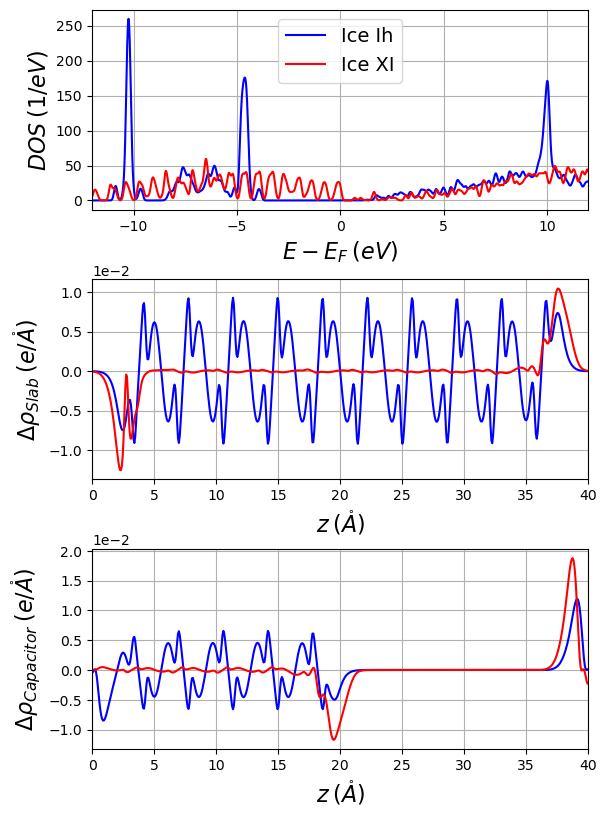

In [8]:
df = pd.read_csv('./Ih_10Bilayers/charge.csv')
Ih = [df['z'].to_numpy(), df['charge'].to_numpy(), df['chargesum'].to_numpy()]
df = pd.read_csv('./XI_10Bilayers/charge.csv')
XI = [df['z'].to_numpy(), df['charge'].to_numpy(), df['chargesum'].to_numpy()]
    
plt.figure(figsize=(6.4, 9.6))
plt.subplot(3,1,1)
Ih_EF = [-3.325870, -3.134494, -3.322503]
XI_EF = [-4.825616, -4.819747, -4.813931]
for bias in range(1):
    plotDOS('./Ih_10Bilayers/Ice_Au{}.DOS'.format(bias), Ih_EF[bias+1], 'Ice Ih')

for bias in range(1):
    plotDOS('./XI_10Bilayers/Ice_Au{}.DOS'.format(bias), XI_EF[bias+1], 'Ice XI', color='r')
plt.xlim(-12,12)
plt.xlabel(r'$E-E_F \: (eV)$', fontsize=16)
plt.ylabel(r'$DOS \: (1/eV)$', fontsize=16)
plt.grid()
plt.legend(fontsize=14, loc='upper center')
plt.subplot(3,1,2)
plt.plot(Ih[0]-19.33464, Ih[1]*0.9523775803782978,'b',label='Ice Ih')
plt.plot(XI[0]-19.33464, XI[1]*0.9523775803782978,'r',label='Ice XI')
plt.xlim(0,40)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel(r'$z \: (\mathring{A})$', fontsize=16)
plt.ylabel(r'$\Delta \rho_{Slab} \: (e/\mathring{A})$', fontsize=16)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.grid()
plt.subplot(3,1,3)
df = pd.read_csv('./Half-Full/IhAu/charge.csv')
Ih1 = [df['z'].to_numpy(), df['charge'].to_numpy(), df['chargesum'].to_numpy()]
df = pd.read_csv('./Half-Full/XIOAu/charge.csv')
XI1 = [df['z'].to_numpy(), df['charge'].to_numpy(), df['chargesum'].to_numpy()]
plt.plot(Ih1[0]-19.33464, Ih1[1],'b',label='Ice Ih')
plt.plot(XI1[0]-19.33464, XI1[1],'r',label='Ice XI')
plt.xlim(0,40)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.xlabel(r'$z \: (\mathring{A})$', fontsize=16)
plt.ylabel(r'$\Delta \rho_{Capacitor} \: (e/\mathring{A})$', fontsize=16)
plt.subplots_adjust(hspace=0.35)
plt.grid()
plt.show()